# Задание взято с [платформы](https://karpov.courses/)
1. Загрузите датасет `transaction_data.csv`. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
2. Какие значения находятся в колонке `transaction`? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
3. Сколько транзакций завершились ошибкой?
4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу `user_vs_minute_pivot`, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
6. Изучите представленный график. Помогите коллеге разобраться, есть ли в данных ошибка, или же всё хорошо.
7. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку `true_minute`.

### Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transaction_data = pd.read_csv('transaction_data.csv')

In [3]:
transaction_data

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [4]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [5]:
transaction_data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [6]:
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

### Какие значения находятся в колонке `transaction`? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

Посмотрим на значения в колонке `transaction` сколько уникальных значений и их количество

In [7]:
transaction_data.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

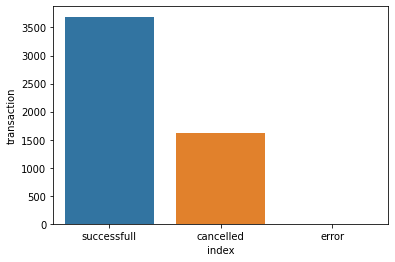

In [8]:
tran = transaction_data.transaction.value_counts().reset_index()
sns.barplot(data=tran, x='index', y='transaction')

### Сколько транзакций завершились ошибкой?

In [13]:
transaction_data[transaction_data.transaction == 'error'].transaction.count()

4

### Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


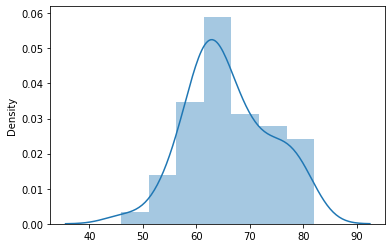

In [26]:
successfull_transaction_data= transaction_data.query('transaction == "successfull"') \
    .groupby('name') \
    .agg({'transaction': 'count'})

sns.distplot(successfull_transaction_data)


Ответим на следующие вопросы
1. Пользователи в среднем совершили примерно по 66 транзакций
2. Максимальное число транзакций – 82
3. Пользователи в среднем совершили по 64 транзакции
4. Примерно 25% пользователей совершили менее 61 транзакции
5. Примерно 25% пользователей совершили более 61 транзакции
6. Пользователи в среднем совершили примерно по 56 транзакций
7. Максимальное число транзакций – 112
8. Пользователи в среднем совершили примерно по 94 транзакции

In [31]:
#1, 3, 6, 8
successfull_transaction_data.transaction.mean()

65.92857142857143

In [32]:
#2, 7
successfull_transaction_data.max()

transaction    82
dtype: int64

In [34]:
#4, 5
successfull_transaction_data.transaction.quantile(0.25)

61.0

### Коллега прислал Вам [обновленные данные](https://stepik.org/media/attachments/lesson/361624/transaction_data_updated.csv). Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [56]:
df = pd.read_csv('transaction_data_updated.csv')

df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [45]:
user_vs_minute_pivot = df.groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction': 'count'}) \
    .pivot(index='minute', columns='name', values='transaction').fillna(0)

### Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
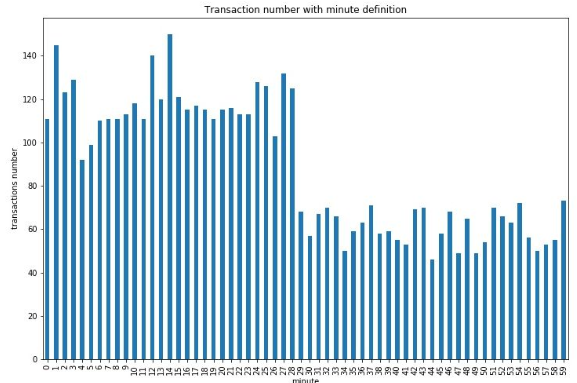


In [ ]:
# на графике только 59 минут, хотя должно быть чутка больше

### Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

In [69]:
df['date'] = pd.to_datetime(df['date'])

In [74]:
df['true_minute'] = df['date'].dt.hour*60+df['date'].dt.minute

In [77]:
user_vs_minute_pivot = df.groupby(['true_minute'], as_index=False) \
    .agg({'transaction': 'count'}) \

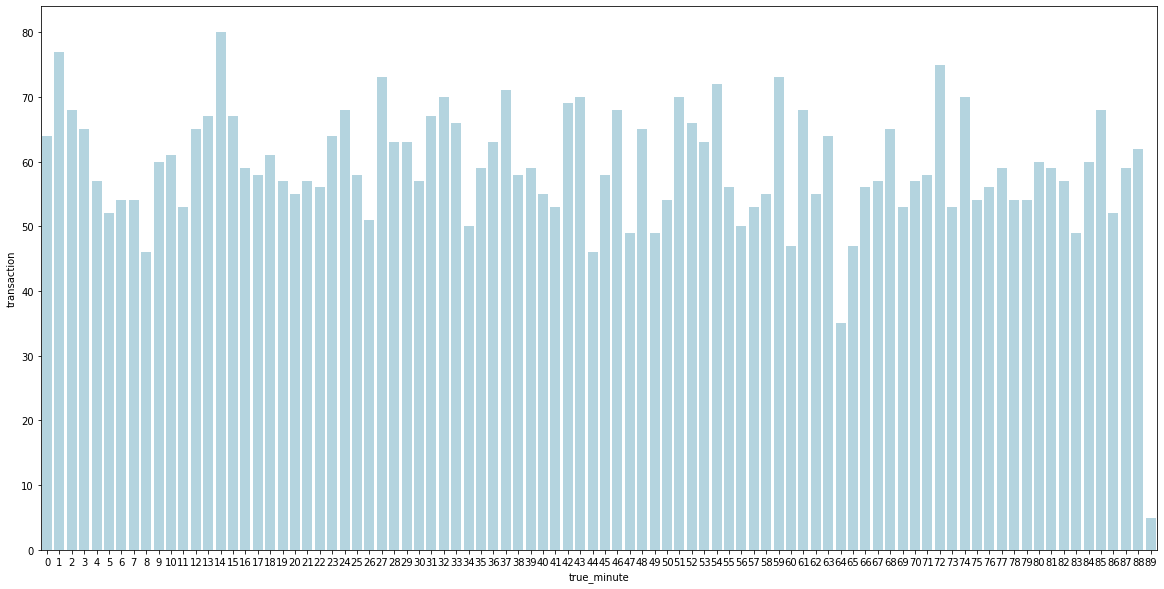

In [102]:
plt.figure(figsize=(20, 10))
sns.barplot(data=user_vs_minute_pivot, x='true_minute', y='transaction', color='lightblue')

## Дополнительный проект
В папке `subsid` (`shared/homeworks/python_ds_miniprojects/5_subsid`) находятся файлы (`tm_sales_1`, `tm_sales_2`, ...) с продажами продуктов через телемаркетинг. Каждый файл содержит, как минимум, 4 колонки (поля): `FILIAL_ID`, `SUBS_ID`, `PROD_ID`, `ACT_DTTM`.

Суть задачи в том, чтобы проверить подключения продуктов определенным пользователям, соединив файлы о продажах с логами по подключениям в системе.

Особенности данных:

1. сотрудники телемаркетинга не всегда указывают полный id, если 'id' нет в начале SUBS_ID, то нужно его добавить
2. поля в файлах могут быть расположены абсолютно случайным образом, но названия полей статичны
3. продажа не засчитывается, если отключение (END_DTTM) произошло меньше чем через 5 минут после подключения (START_DTTM)
4. если в файле с продажами встречается строка без указанного SUBS_ID, она пропускается

Сохраните результат в csv файл с разделителем ;, содержащий корректные подключения.

Пример содержания итогового файла

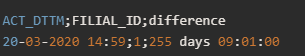

In [104]:
import os

In [109]:
path_to_dir = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-otvetchikov/shared/homeworks/python_ds_miniprojects/5_subsid/subsid'

In [141]:
all_df = pd.DataFrame()

In [146]:
for file in os.listdir(path_to_dir):
    if file.startswith('tm_sales'):
        df = pd.read_csv(path_to_dir+'/'+file, sep=';')[['SUBS_ID','PROD_ID', 'FILIAL_ID','ACT_DTTM']].dropna()
        df['SUBS_ID'] = df['SUBS_ID'].apply(lambda x: x if x.startswith('id') else 'id'+x)
        all_df = pd.concat([all_df, df])
all_df

,SUBS_ID,PROD_ID,FILIAL_ID,ACT_DTTM
0,id4651830,1954,1,20-03-2020 14:59
1,id7646509,6431,5,19-03-2020 13:00
2,id7412683,3313,4,22-03-2020 17:25
0,id5416547,1743,3,17-03-2020 10:17
2,id8362218,9879,7,05-03-2020 11:42
3,id2185490,3210,2,16-03-2020 16:28
0,id5764122,1499,3,18-03-2020 15:44
1,id7642700,3020,6,15-03-2020 14:21
2,id1374509,5677,2,17-03-2020 11:48


In [154]:
activations_logs = pd.read_csv(path_to_dir+'/'+os.listdir(path_to_dir)[0], sep=';')

In [157]:
pd.to_datetime(activations_logs['START_DTTM']) - pd.to_datetime(activations_logs['END_DTTM'])

1     68 days 14:59:00
5    -1 days +23:57:00
2     68 days 17:25:00
3    -9 days +23:17:00
4    -1 days +23:59:00
3   -32 days +00:00:00
2     64 days 16:28:00
6    -1 days +14:39:00
2     67 days 12:28:00
dtype: timedelta64[ns]

In [173]:
final_df = activations_logs.merge(all_df, on=['SUBS_ID', 'PROD_ID'], how='inner')

In [174]:
final_df['difference'] = pd.to_datetime(final_df['END_DTTM'], format='%d-%m-%Y %H:%M') \
                    - pd.to_datetime(final_df['START_DTTM'], format='%d-%m-%Y %H:%M')

In [197]:
final_df[final_df['difference'].dt.total_seconds() > 300] \
    .reset_index(drop=True)[['ACT_DTTM', 'FILIAL_ID', 'difference']] \
    .sort_values('FILIAL_ID').to_csv(sep=';')


';ACT_DTTM;FILIAL_ID;difference\n0;20-03-2020 14:59;1;255 days 09:01:00\n2;16-03-2020 16:28;2;259 days 07:32:00\n1;17-03-2020 10:17;3;8 days 00:43:00\n3;15-03-2020 14:21;6;0 days 09:21:00\n'

In [194]:
final_df[final_df['difference'].dt.total_seconds() > 300] \
    .sort_values('SUBS_ID')

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM,FILIAL_ID,ACT_DTTM,difference
3,id2185490,3210,16-03-2020 16:28,01-12-2020 00:00,2,16-03-2020 16:28,259 days 07:32:00
0,id4651830,1954,20-03-2020 14:59,01-12-2020 00:00,1,20-03-2020 14:59,255 days 09:01:00
2,id5416547,1743,17-03-2020 10:17,25-03-2020 11:00,3,17-03-2020 10:17,8 days 00:43:00
4,id7642700,3020,15-03-2020 14:21,15-03-2020 23:42,6,15-03-2020 14:21,0 days 09:21:00
